<a href="https://colab.research.google.com/github/HugoAlmeida08/Data-Science/blob/main/Limpeza_e_visualiza%C3%A7%C3%A3o_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Limpeza e visualização dos dados





In [ ]:
import pandas as pd
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tmdb = pd.read_csv("movies.csv")
tmdb.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tmdb["original_language"].value_counts().index
tmdb["original_language"].value_counts().values


KeyError: ignored

In [ ]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


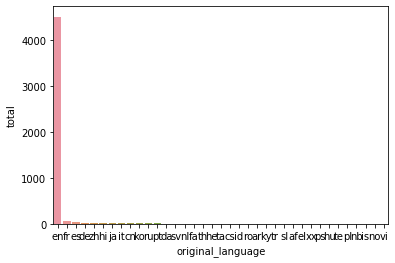

In [ ]:
sns.barplot(x ="original_language", y = "total", data = contagem_de_lingua)

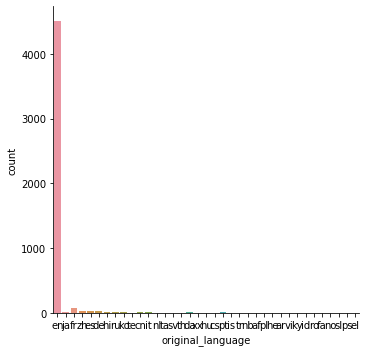

In [ ]:
sns.catplot(x="original_language", kind = "count", data = tmdb)

In [ ]:
print(sns.__version__)
import matplotlib.pyplot as plt


0.10.0


([<matplotlib.patches.Wedge at 0x7f70f446d1d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

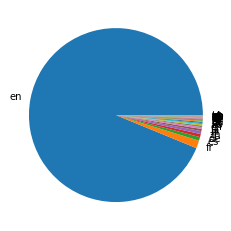

In [ ]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_resto = total_geral - total_de_ingles
print(total_de_ingles, total_resto)

4505 298


In [ ]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total' : [total_de_ingles, total_resto]

}
dados


{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [ ]:
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


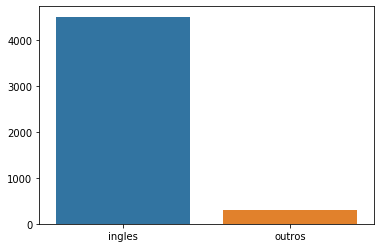

In [ ]:
sns.barplot(x = 'lingua', y='total', data = dados)

([<matplotlib.patches.Wedge at 0x7f70f4391828>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

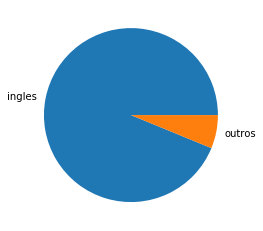

In [ ]:
plt.pie(dados["total"], labels = dados["lingua"])

In [ ]:
total_por_outras_linguas = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_outras_linguas

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
th     3
he     3
ro     2
ar     2
id     2
ta     2
cs     2
te     1
tr     1
pl     1
af     1
is     1
no     1
xx     1
nb     1
el     1
vi     1
ky     1
hu     1
sl     1
ps     1
Name: original_language, dtype: int64

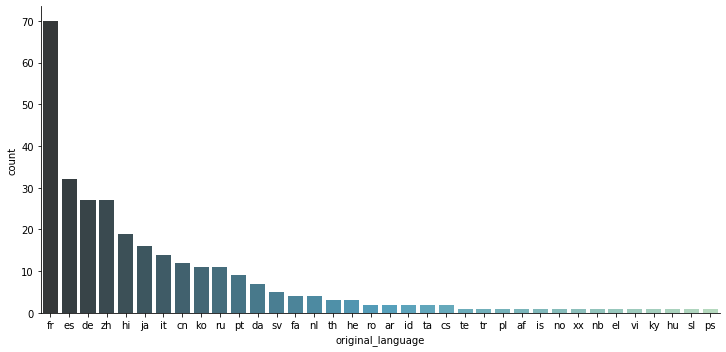

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(x="original_language", kind="count",
            data = filmes_sem_lingua_original_em_ingles,
            aspect = 2,
            order = total_por_outras_linguas.index,
            palette = "GnBu_d")

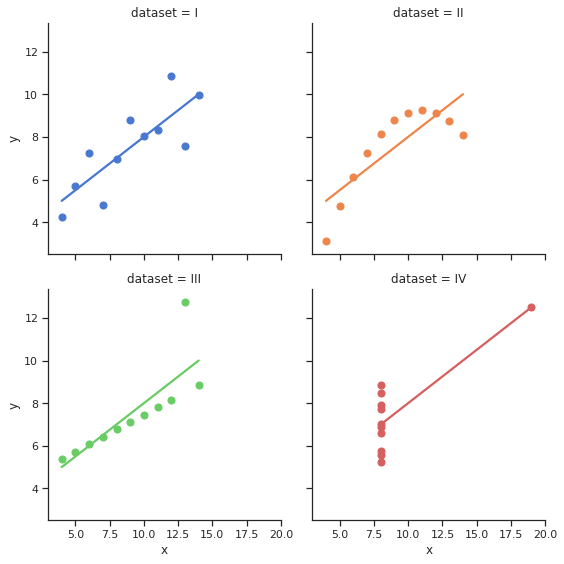

In [ ]:
sns.set(style="ticks")
df = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette = "muted", height = 4,
           scatter_kws={"s":50, "alpha":1})

#Dados e estatística

In [ ]:
filmes = pd.read_csv("movies.csv")
filmes.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas_toy_story = notas.query("movieId == 1")
notas_toy_story

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
notas_jumanji = notas.query("movieId == 2")
notas_jumanji

,userId,movieId,rating,timestamp
560,6,2,4.0,845553522
1026,8,2,4.0,839463806
1773,18,2,3.0,1455617462
2275,19,2,3.0,965704331
2977,20,2,3.0,1054038313
...,...,...,...,...
95102,600,2,4.0,1237764627
95965,602,2,4.0,840875851
97044,604,2,5.0,832080293
97144,605,2,3.5,1277176522


In [ ]:
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [ ]:
print("Nota média do Toy Story %.2f" % notas_toy_story.rating.mean())
print("Nota média do Jumanji %.2f" % notas_jumanji.rating.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [ ]:
  print("Nota média do Toy Story %.2f" % notas_toy_story.rating.median())
print("Nota média do Jumanji %.2f" % notas_jumanji.rating.median())

Nota média do Toy Story 4.00
Nota média do Jumanji 3.50


#Medidas de tendência(média, mediana, moda, tendência central, desvio padrão, histograma, boxplot)


In [ ]:
import numpy as np
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [ ]:
filme1.mean()


3.0

In [ ]:
filme2.mean()

3.0

In [ ]:
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


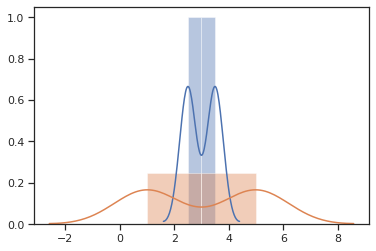

In [ ]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

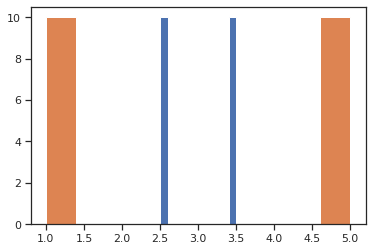

In [ ]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f70f04cfba8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f70f04df5f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f70f04ea048>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f70f04dfc88>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f70f04cfef0>,
  <matplotlib.lines.Line2D at 0x7f70f04eaac8>]}

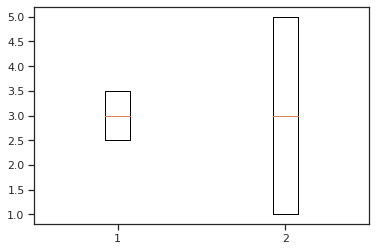

In [ ]:
plt.boxplot([filme1, filme2])

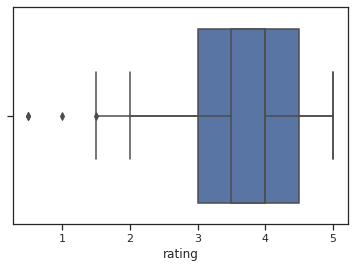

In [ ]:
sns.boxplot(notas_toy_story.rating)
sns.boxplot(notas_jumanji.rating)

{'boxes': [<matplotlib.lines.Line2D at 0x7f70f0377940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f70f0309390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f70f0309e10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f70f0309a90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f70f03a3da0>,
  <matplotlib.lines.Line2D at 0x7f70f0313898>]}

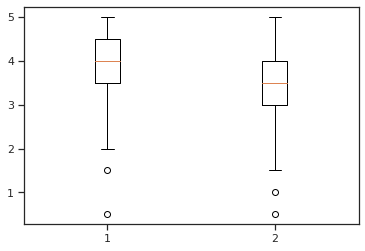

In [ ]:
plt.boxplot([notas_toy_story.rating, notas_jumanji.rating])

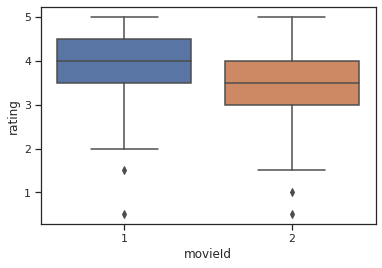

In [ ]:
sns.boxplot(x = "movieId", y = "rating", data = notas.query("movieId in [1,2]"))

In [ ]:
print(notas_toy_story.rating.std(),
notas_jumanji.rating.std())

0.8348591407114045 0.8817134921476455


In [ ]:
print(np.std(filme1), np.std(filme2))

0.5 2.0
